#Visão geral das taxas de suicídio 1985 a 2016

**Integrantes:**


* Ana Paula Cardoso de Castro Kendall
* Francelino Teotonio Júnior
* Vivianny Khatly Medeiros Pereira



**Introdução**

Nesse projeto foi usado a dataset do site (https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016) que consta a taxa de suicídio em muitos países que tem sido bastante alta por muitos anos, incluindo os países em desenvolvimento e desenvolvidos. Veremos a taxa de suicídio do sexo, e depois a idade e a geração em 31 anos (1985 - 2016)

**Dados Usados**



*  Para os dados usados foi requerido o dataset do site kaggle

Os dados utilizados foram de um dataset chamado "master" que foi um estudo para a prevenção do suicidio e foi construído para encontrar sinais correlacionados ao aumento das taxas de suicídio entre diferentes coortes globalmente, em todo o espectro socioeconômico.



#Variáveis

country - país

year - ano

sex - sexo

age - idade

suicides_no - suicidios

population - população

suicides/100k pop -suicidios dividido por população

country-year - país ano

HDI for year - IDH por ano(indice de desonvolvimento humano)

gdp_for_year - PIB Produto Interno Bruto por ano 

gdp_per_capita - O Produto Interno Bruto - PIB per capita de cada município foi estimado pelo quociente entre o valor do PIB do municípioe sua população residente.

generation - geração

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd
from scipy import stats
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
%matplotlib inline

master = pd.read_csv("master.csv")
master

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z



Vamos ver o desempenho do sexo. 

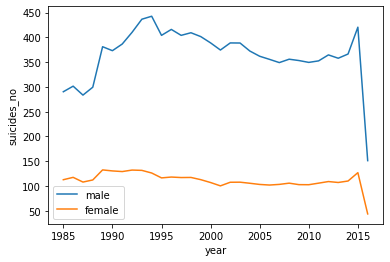

In [50]:
df_men = df[df.sex == "male"]
df_women = df[df.sex == "female"]
sns.lineplot(df_men.year, df.suicides_no, ci = None)
sns.lineplot(df_women.year, df.suicides_no, ci = None)
plt.legend(["male", 'female'])
plt.show()


Suicídio por 100k habitantes para homens é maior que para mulheres

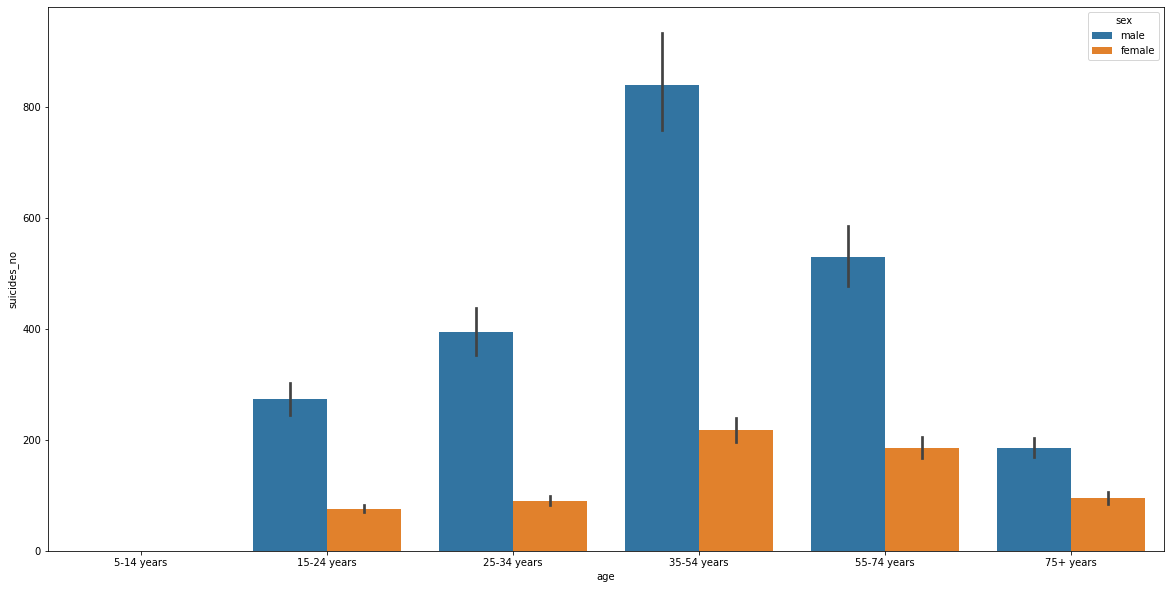

In [51]:
plt.figure(figsize=(20,10))
sns.barplot(df.age, df.suicides_no, hue=df.sex,order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years'])


Não importa em que ano seja, o número de suicídios do sexo masculino é cerca de três vezes maior do que o do feminino. Como sobre a idade?

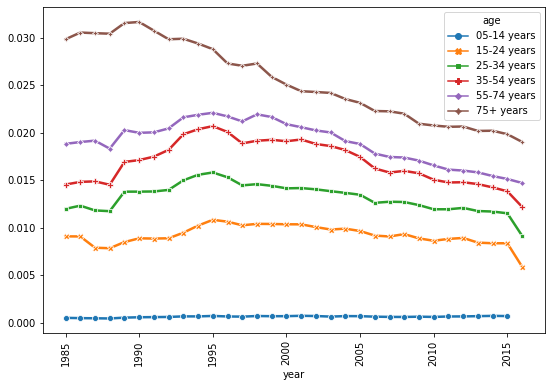

In [52]:
df_age = df.groupby(["year","age"])["suicides_no", "population"].sum()
df_reset = df_age.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_reset.suicides_no*100/df_reset.population, hue = "age",
             data = df_reset, linewidth = 2.5, style = "age", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()


Obviamente, a taxa de suicídio está aumentando quando a idade é maior. Ou seja, a idade é um fator de suicídio.

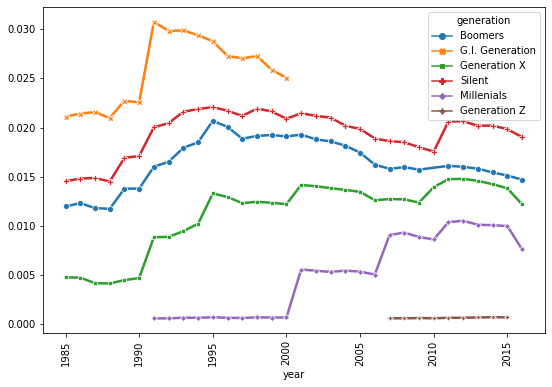

In [53]:
df_generation = df.groupby(["year", "generation"])["suicides_no", "population"].sum()
df_generation_reset = df_generation.copy().reset_index()
plt.figure(figsize=(9,6))
sns.lineplot("year", df_generation_reset.suicides_no*100/df_generation_reset.population, hue = "generation", 
            data = df_generation_reset, linewidth = 2.5, style = "generation", markers=True
            , dashes=False)
plt.xticks(rotation = 90)
plt.show()

#**Conclusão**

Em geral, a taxa de suicídio está relacionada a vários fatores. A idade. De acordo com a taxa de suicídio de cada nível de idade, a taxa de idosos é maior, por isso os jovens devem se preocupar mais com os idosos. Além disso, o bem-estar rural dos idosos também pode impactar a taxa.

A pressão social. Uma sociedade saudável pode fazer com que os cidadãos se sintam seguros e satisfeitos, então como aliviar a pressão social se torna um tema importante para todos os países. Nosso propósito não é apenas reduzir a taxa de suicídio, mas também construir um mundo melhor.